# <a name="0">MLA TAB DAY 1: Data Processing and ML Model Development</a>

## Exploratory data analysis

### Sample Problem: Detecting Products with Electrical Plugs in Amazon Marketplace Products

In this notebook, we explore an Amazon dataset. In some marketplaces, ASINs having electrical plugs need to be accompanied by a compliance form. Thus it is desirable to identify ASINs with an electrical plug.

1. <a href="#1">Read the dataset</a>
2. <a href="#2">Overall Statistics</a>
3. <a href="#3">Univariate Statistics: Basic Plots</a>
4. <a href="#4">Multivariate Statistics: Scatter Plots and Correlations</a>
5. <a href="#5">Handling Missing Values</a>
    * <a href="#51">Drop columns with missing values</a>
    * <a href="#52">Drop rows with missing values</a>
    * <a href="#53"> Impute (fill-in) missing values with .fillna()</a>
    * <a href="#54"> Impute (fill-in) missing values with sklearn's SimpleImputer</a>
    
__Data schema:__ 
- __ASIN__: Product ASIN
- __target_label:__ Binary field with values in {0,1}. A value of 1 show ASIN has a plug, otherwise 0.
- __ASIN_STATIC_ITEM_NAME:__ Title of the ASIN.
- __ASIN_STATIC_PRODUCT_DESCRIPTION:__ Description of the ASIN
- __ASIN_STATIC_GL_PRODUCT_GROUP_TYPE:__ GL information for the ASIN.
- __ASIN_STATIC_ITEM_PACKAGE_WEIGHT:__ Weight of the ASIN.
- __ASIN_STATIC_LIST_PRICE:__ Price information for the ASIN.
- __ASIN_STATIC_BATTERIES_INCLUDED:__ Information whether batteries are included along with the product.
- __ASIN_STATIC_BATTERIES_REQUIRED:__ Information whether batteries are required for using the product.
- __ASIN_STATIC_ITEM_CLASSIFICATION:__ Item classification of whether it is a standalone or bundle parent item etc

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

Let's read the dataset into a dataframe, using Pandas.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
  
df = pd.read_csv('../data/review/asin_electrical_plug.csv')

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (61233, 10)


## 2. <a name="2">Overall Statistics</a>
(<a href="#0">Go to top</a>)

We will look at number of rows, columns and some simple statistics of the dataset.

In [2]:
# Print the first five rows
# NaN means missing data
df.head(10)

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_PRODUCT_DESCRIPTION,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE,ASIN_STATIC_BATTERIES_INCLUDED,ASIN_STATIC_BATTERIES_REQUIRED,ASIN_STATIC_ITEM_CLASSIFICATION
0,B004U9MOWO,0,Master Lock 8 X 900 mm Chain Integrated 4 Digi...,Master Lock Street Flexium 900mm Integrated Co...,gl_sports,2.650000,16.66,False,False,base_product
1,B006OJWZMW,0,In Phase SRX-EQ 10 Band Parametric Equalizer w...,NaN,gl_wireless,1.680000,158.33,False,False,base_product
2,B00008VIJ4,0,Technics RPDJ1210 DJ Headphones - Silver,"Plated Connector:Gold, Connector Type:Headphon...",gl_home_entertainment,1.455036,NaN,False,False,base_product
3,B005433T4M,0,"Heartwarmers Coming Home Padded Lap Tray, 42 x...",NaN,gl_home,1.763680,12.49,False,NaN,base_product
4,B0073CN63Q,0,"Douceur D'Intérieur - 1600728, Curtain With E...",NaN,gl_home,2.292784,25.42,False,False,base_product
5,B00F5223QM,0,Legler Lamborghini Aventador LP700 Plastic Model,A car for stars and super rich ones! In matt b...,gl_toy,5.070580,NaN,False,True,base_product
6,B00MGT8FAA,0,MARTY Food for Cannaries,NaN,gl_pet_products,2.292784,NaN,False,NaN,base_product
7,B003ESVCGG,0,Apiro 150006 Twin Square Car Exhaust Tip,"Exhaust Back Box, Stainless Steel, Universal S...",gl_automotive,9.347505,NaN,NaN,NaN,base_product
8,B00187PYTQ,0,Bresser spotting scope Pirsch 20-60x80,<b>Bresser are proud to introduce their latest...,gl_camera,5.950000,NaN,False,True,base_product
9,B00074U7VQ,0,Small Foot Company 1710 Garden Tool Bag,Garden Bag - dark<br/>,gl_toy,1.719588,NaN,False,False,base_product


In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61233 entries, 0 to 61232
Data columns (total 10 columns):
ASIN                                 61233 non-null object
target_label                         61233 non-null int64
ASIN_STATIC_ITEM_NAME                61233 non-null object
ASIN_STATIC_PRODUCT_DESCRIPTION      35261 non-null object
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    61233 non-null object
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      61141 non-null float64
ASIN_STATIC_LIST_PRICE               45741 non-null float64
ASIN_STATIC_BATTERIES_INCLUDED       50058 non-null object
ASIN_STATIC_BATTERIES_REQUIRED       45229 non-null object
ASIN_STATIC_ITEM_CLASSIFICATION      61221 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 4.7+ MB


In [4]:
# This prints basic statistics for numerical columns
df.describe()

,target_label,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE
count,61233.000000,61141.000000,4.574100e+04
mean,0.036647,31.520023,1.475785e+02
std,0.187895,462.639041,1.664631e+04
min,0.000000,0.000000,1.160000e+00
25%,0.000000,1.520000,1.667000e+01
50%,0.000000,2.513244,3.291000e+01
75%,0.000000,5.555592,7.000000e+01
max,1.000000,29500.000000,3.560000e+06


Let's choose model features and model target. 

In [5]:
print(df.columns)

Index(['ASIN', 'target_label', 'ASIN_STATIC_ITEM_NAME',
       'ASIN_STATIC_PRODUCT_DESCRIPTION', 'ASIN_STATIC_GL_PRODUCT_GROUP_TYPE',
       'ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE',
       'ASIN_STATIC_BATTERIES_INCLUDED', 'ASIN_STATIC_BATTERIES_REQUIRED',
       'ASIN_STATIC_ITEM_CLASSIFICATION'],
      dtype='object')


In [6]:
model_features = df.columns.drop('target_label')
model_target = 'target_label'

print('Model features: ', model_features)
print('Model target: ', model_target)

Model features:  Index(['ASIN', 'ASIN_STATIC_ITEM_NAME', 'ASIN_STATIC_PRODUCT_DESCRIPTION',
       'ASIN_STATIC_GL_PRODUCT_GROUP_TYPE', 'ASIN_STATIC_ITEM_PACKAGE_WEIGHT',
       'ASIN_STATIC_LIST_PRICE', 'ASIN_STATIC_BATTERIES_INCLUDED',
       'ASIN_STATIC_BATTERIES_REQUIRED', 'ASIN_STATIC_ITEM_CLASSIFICATION'],
      dtype='object')
Model target:  target_label


## 3. <a name="3">Basic Plots</a>
(<a href="#0">Go to top</a>)

In this section, we will further examine our data with plots. Important note: These plots ignore null (missing) values. We will learn how to deal with missing values in the next section.


__Bar plots__: These plots show counts of categorical data fields. __value_counts()__ function yields the counts of each unique value. It is useful for categorical variables.

In [7]:
df[model_target].value_counts()

0    58989
1     2244
Name: target_label, dtype: int64

__plot.bar()__ addition to the __value_counts()__ function makes a bar plot of the values.

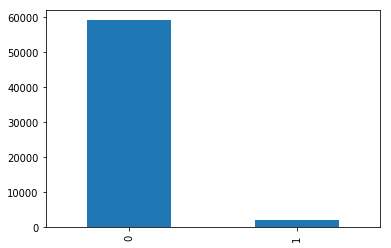

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

df[model_target].value_counts().plot.bar()
plt.show()

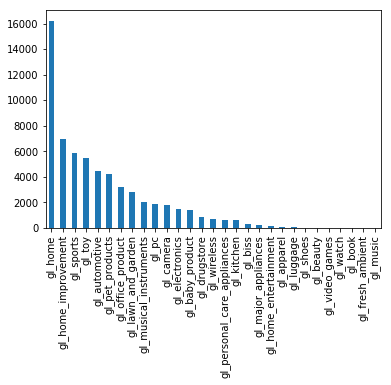

In [9]:
import matplotlib.pyplot as plt

df['ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'].value_counts().plot.bar()
plt.show()

In [10]:
df['ASIN_STATIC_GL_PRODUCT_GROUP_TYPE'].value_counts()

gl_home                        16221
gl_home_improvement             6985
gl_sports                       5868
gl_toy                          5493
gl_automotive                   4435
gl_pet_products                 4231
gl_office_product               3229
gl_lawn_and_garden              2779
gl_musical_instruments          2008
gl_pc                           1837
gl_camera                       1790
gl_electronics                  1440
gl_baby_product                 1375
gl_drugstore                     857
gl_wireless                      655
gl_personal_care_appliances      643
gl_kitchen                       626
gl_biss                          259
gl_major_appliances              237
gl_home_entertainment            116
gl_apparel                        58
gl_luggage                        34
gl_shoes                          22
gl_beauty                         20
gl_video_games                     7
gl_watch                           3
gl_book                            3
g

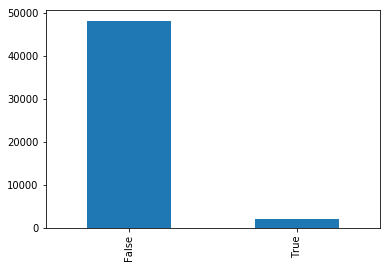

In [11]:
df['ASIN_STATIC_BATTERIES_INCLUDED'].value_counts().plot.bar()
plt.show()

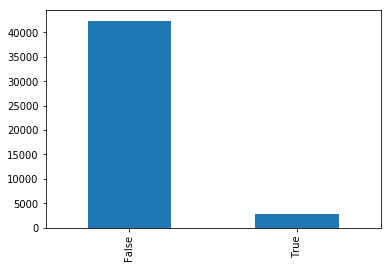

In [12]:
df['ASIN_STATIC_BATTERIES_REQUIRED'].value_counts().plot.bar()
plt.show()

__Histograms:__ Histograms show distribution of numeric data. Data is divided into "buckets" or "bins".

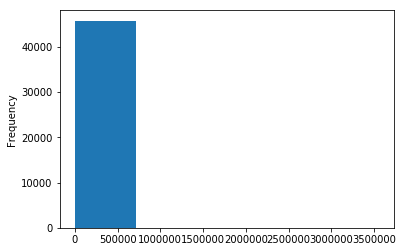

In [13]:
df['ASIN_STATIC_LIST_PRICE'].plot.hist(bins=5)
plt.show()

When we look at the histogram above, we can see that values are heavily placed in the first bin. Let's check the min-max values below.

In [14]:
df['ASIN_STATIC_LIST_PRICE'].min()

1.16

In [15]:
df['ASIN_STATIC_LIST_PRICE'].max()

3560000.0

__value_counts()__ function again becomes useful here. Let's increase the number of bins to 10 for more bins. Looking below, we can see that we have an outlier number in the last bin. We have a very expensive item of worth more than __3 million $__ :) 

This is likely a wrong value. We will drop this record.

In [16]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-3558.84, 356001.044]        45740
(356001.044, 712000.928]          0
(712000.928, 1068000.812]         0
(1068000.812, 1424000.696]        0
(1424000.696, 1780000.58]         0
(1780000.58, 2136000.464]         0
(2136000.464, 2492000.348]        0
(2492000.348, 2848000.232]        0
(2848000.232, 3204000.116]        0
(3204000.116, 3560000.0]          1
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

In [17]:
dropIndexes = df[df['ASIN_STATIC_LIST_PRICE'] > 3000000].index
df.drop(dropIndexes , inplace=True)

In [18]:
df['ASIN_STATIC_LIST_PRICE'].value_counts(bins=10, sort=False)

(-13.838999999999999, 1500.944]    45704
(1500.944, 3000.728]                  15
(3000.728, 4500.512]                   9
(4500.512, 6000.296]                   3
(6000.296, 7500.08]                    2
(7500.08, 8999.864]                    4
(8999.864, 10499.648]                  0
(10499.648, 11999.432]                 1
(11999.432, 13499.216]                 0
(13499.216, 14999.0]                   2
Name: ASIN_STATIC_LIST_PRICE, dtype: int64

Let' see the histogram again.

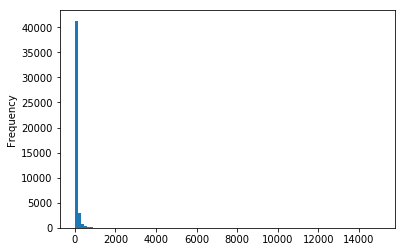

In [19]:
df['ASIN_STATIC_LIST_PRICE'].plot.hist(bins=100)
plt.show()

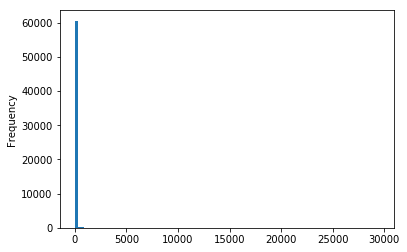

In [20]:
df['ASIN_STATIC_ITEM_PACKAGE_WEIGHT'].plot.hist(bins=100)
plt.show()

In [21]:
df['ASIN_STATIC_ITEM_PACKAGE_WEIGHT'].value_counts(bins=5, sort=False)

(-29.501, 5900.0]     61064
(5900.0, 11800.0]        51
(11800.0, 17700.0]       20
(17700.0, 23600.0]        1
(23600.0, 29500.0]        4
Name: ASIN_STATIC_ITEM_PACKAGE_WEIGHT, dtype: int64

## 4. <a name="4">Scatter Plots and Correlation</a>
(<a href="#0">Go to top</a>)

### Scatter plot
Scatter plots are simple 2D plots of two numerical variables that can be used to examine the relationship between two variables. Below, we are plotting __ASIN_STATIC_ITEM_PACKAGE_WEIGHT__ vs. __ASIN_STATIC_LIST_PRICE__. 

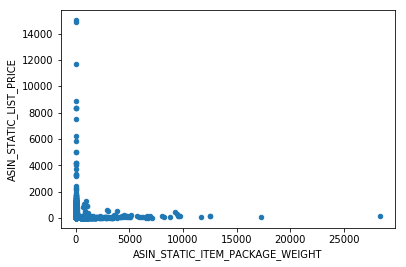

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

df.plot.scatter(x='ASIN_STATIC_ITEM_PACKAGE_WEIGHT', y='ASIN_STATIC_LIST_PRICE')
plt.show()

From this scatter plot, we cannot see a relationship between these two variables. 

### Scatterplot with Identification

We can also add the target values, "Plug" or "No plug", to our scatter plot.

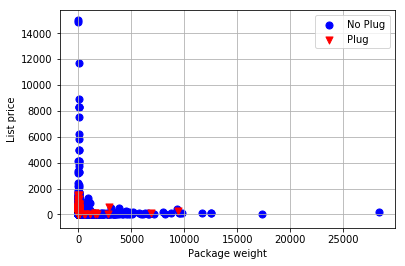

In [23]:
import seaborn as sns

X1 = df[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']][df['target_label'] == 0]
X2 = df[['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']][df['target_label'] == 1]

plt.scatter(X1.iloc[:,0], 
            X1.iloc[:,1], 
            s=50, 
            c='blue', 
            marker='o', 
            label='No Plug')

plt.scatter(X2.iloc[:,0], 
            X2.iloc[:,1], 
            s=50, 
            c='red', 
            marker='v', 
            label='Plug')

plt.xlabel('Package weight')
plt.ylabel('List price')
plt.legend()
plt.grid()
plt.show()

From this plot, we notice that we can't get a good separation between the data points, based on these two numerical features alone. 

### Correlation Matrix Heatmat
We plot the correlation matrix. Correlation scores are calculated for numerical fields. For that reason, we will only pick the numerical fields: __ASIN_STATIC_ITEM_PACKAGE_WEIGHT__ and __ASIN_STATIC_LIST_PRICE__.

In [24]:
cols = ['ASIN_STATIC_ITEM_PACKAGE_WEIGHT', 'ASIN_STATIC_LIST_PRICE']
#print(df[cols].corr())
df[cols].corr().style.background_gradient(cmap='tab20c')

,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_LIST_PRICE
ASIN_STATIC_ITEM_PACKAGE_WEIGHT,1,0.0128493
ASIN_STATIC_LIST_PRICE,0.0128493,1


From the correlation matrix, we can see that there is no relationship between listing price and item package weight.

### A fancy example using Seaborn
Simulating a dataset with some correlations we can show a fancy example below for 26 dimensions.

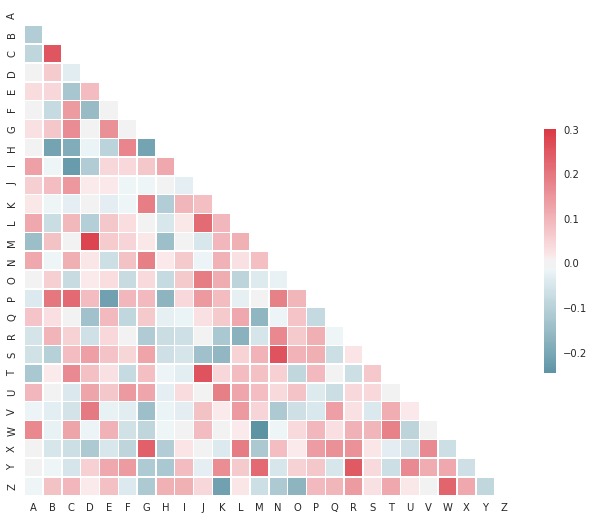

In [25]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## 5. <a name="5">Handling Missing Values</a>
(<a href="#0">Go to top</a>)

  * <a href="#51">Drop columns with missing values</a>
  * <a href="#52">Drop rows with missing values</a>
  * <a href="#53"> Impute (fill-in) missing values with .fillna()</a>
  * <a href="#54"> Impute (fill-in) missing values with sklearn's SimpleImputer</a>

Let's first check the number of missing (nan) values for each column.

In [26]:
df.isna().sum()

ASIN                                     0
target_label                             0
ASIN_STATIC_ITEM_NAME                    0
ASIN_STATIC_PRODUCT_DESCRIPTION      25972
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE        0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT         92
ASIN_STATIC_LIST_PRICE               15492
ASIN_STATIC_BATTERIES_INCLUDED       11175
ASIN_STATIC_BATTERIES_REQUIRED       16004
ASIN_STATIC_ITEM_CLASSIFICATION         12
dtype: int64

There are quite a few values missing on many columns, of both numerical and categorical types. Let's explore a few options dealing with missing values.

### <a name="51">Drop columns with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

We can drop some columns if we think there is siginificant amount of missing data in those columns.

__Hint:__ You can also use __inplace=True__ parameter to drop columns inplace without assignment.


In [27]:
df_columns_dropped = df.drop(columns = ["ASIN_STATIC_PRODUCT_DESCRIPTION", 
                                        "ASIN_STATIC_LIST_PRICE",
                                        "ASIN_STATIC_BATTERIES_INCLUDED",
                                        "ASIN_STATIC_BATTERIES_REQUIRED"
                                       ])  
df_columns_dropped.head()

,ASIN,target_label,ASIN_STATIC_ITEM_NAME,ASIN_STATIC_GL_PRODUCT_GROUP_TYPE,ASIN_STATIC_ITEM_PACKAGE_WEIGHT,ASIN_STATIC_ITEM_CLASSIFICATION
0,B004U9MOWO,0,Master Lock 8 X 900 mm Chain Integrated 4 Digi...,gl_sports,2.650000,base_product
1,B006OJWZMW,0,In Phase SRX-EQ 10 Band Parametric Equalizer w...,gl_wireless,1.680000,base_product
2,B00008VIJ4,0,Technics RPDJ1210 DJ Headphones - Silver,gl_home_entertainment,1.455036,base_product
3,B005433T4M,0,"Heartwarmers Coming Home Padded Lap Tray, 42 x...",gl_home,1.763680,base_product
4,B0073CN63Q,0,"Douceur D'Intérieur - 1600728, Curtain With E...",gl_home,2.292784,base_product


In [28]:
df_columns_dropped.isna().sum()

ASIN                                  0
target_label                          0
ASIN_STATIC_ITEM_NAME                 0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE     0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      92
ASIN_STATIC_ITEM_CLASSIFICATION      12
dtype: int64

In [29]:
df_columns_dropped.shape

(61232, 6)

Note the reduced size of the dataset features, from 10 to 6. This can sometimes lead to underfitting models -- not having enough features to build a good model able to capture the pattern in the dataset, especially when dropping features that are essential to the task at hand. 

### <a name="52">Drop rows with missing values</a>
(<a href="#5">Go to Handling Missing Values</a>)

Here, we simply drop rows that have at least one missing value. There are other drop options to explore, depending on specific problems.

In [30]:
df_missing_dropped = df.dropna()

Let's check the missing values below.

In [31]:
df_missing_dropped.isna().sum()

ASIN                                 0
target_label                         0
ASIN_STATIC_ITEM_NAME                0
ASIN_STATIC_PRODUCT_DESCRIPTION      0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      0
ASIN_STATIC_LIST_PRICE               0
ASIN_STATIC_BATTERIES_INCLUDED       0
ASIN_STATIC_BATTERIES_REQUIRED       0
ASIN_STATIC_ITEM_CLASSIFICATION      0
dtype: int64

In [32]:
df_missing_dropped.shape

(20210, 10)

The number of data samples reduced dramatically. This can sometimes lead to overfitting models -- especially when the number of features is greater or comparable to the number of data samples. 

### <a name="53">Impute (fill-in) missing values with .fillna()</a>
(<a href="#5">Go to Handling Missing Values</a>)

__Imputing Numerical Values:__ The easiest way to impute numerical values is to get the __average (mean) value__ for the corresponding column and use that as the new value for each missing record in that column. 

In [33]:
# Impute our two numerical features by using the mean per feature to replace the nans
numerical_features = ["ASIN_STATIC_ITEM_PACKAGE_WEIGHT", "ASIN_STATIC_LIST_PRICE"]

# Assign our df to a new df 
df_imputed = df.copy()
print(df_imputed[numerical_features].isna().sum())

# Impute our two numerical features with the means. 
df_imputed[numerical_features] = df_imputed[numerical_features].fillna(df_imputed[numerical_features].mean())

print(df_imputed[numerical_features].isna().sum())

ASIN_STATIC_ITEM_PACKAGE_WEIGHT       92
ASIN_STATIC_LIST_PRICE             15492
dtype: int64
ASIN_STATIC_ITEM_PACKAGE_WEIGHT    0
ASIN_STATIC_LIST_PRICE             0
dtype: int64


__Imputing Categorical Values:__ We can impute categorical values by getting the most common (mode) value for the corresponding column and use that as the new value for each missing record in that column. 

In [34]:
# Impute two categorical features by using the mode per feature to replace the nans
categorical_features_0 = ["ASIN_STATIC_BATTERIES_INCLUDED", "ASIN_STATIC_BATTERIES_REQUIRED"]

# Assign our df to a new df 
df_imputed_c = df.copy()
print(df_imputed_c[categorical_features_0].isna().sum())

# Find the mode per each feature
mode_impute = df_imputed_c[categorical_features_0].mode()
print(mode_impute)

# Impute our two categorical features with the computed. 
# "inplace=True" parameter replaces missing values in place (no need for left handside assignment)
df_imputed_c["ASIN_STATIC_BATTERIES_INCLUDED"].fillna(False, inplace = True)
df_imputed_c["ASIN_STATIC_BATTERIES_REQUIRED"].fillna(False, inplace = True)

print(df_imputed_c[categorical_features_0].isna().sum())

ASIN_STATIC_BATTERIES_INCLUDED    11175
ASIN_STATIC_BATTERIES_REQUIRED    16004
dtype: int64
  ASIN_STATIC_BATTERIES_INCLUDED ASIN_STATIC_BATTERIES_REQUIRED
0                          False                          False
ASIN_STATIC_BATTERIES_INCLUDED    0
ASIN_STATIC_BATTERIES_REQUIRED    0
dtype: int64


We can also create a new category such as "Missing" for selected categorical features.

In [35]:
# Impute two categorical features by using the mode per feature to replace the nans
categorical_features = ["ASIN_STATIC_BATTERIES_INCLUDED", 
                  "ASIN_STATIC_BATTERIES_REQUIRED",
                  "ASIN_STATIC_PRODUCT_DESCRIPTION", 
                  "ASIN_STATIC_ITEM_CLASSIFICATION"]

print(df_imputed[categorical_features].isna().sum())

# Impute our categorical features with a new category named "Missing". 
df_imputed[categorical_features] = df_imputed[categorical_features].fillna("Missing")

print(df_imputed[categorical_features].isna().sum())


ASIN_STATIC_BATTERIES_INCLUDED     11175
ASIN_STATIC_BATTERIES_REQUIRED     16004
ASIN_STATIC_PRODUCT_DESCRIPTION    25972
ASIN_STATIC_ITEM_CLASSIFICATION       12
dtype: int64
ASIN_STATIC_BATTERIES_INCLUDED     0
ASIN_STATIC_BATTERIES_REQUIRED     0
ASIN_STATIC_PRODUCT_DESCRIPTION    0
ASIN_STATIC_ITEM_CLASSIFICATION    0
dtype: int64


Let's check again all missing values below.

In [36]:
df_imputed.isna().sum()

ASIN                                 0
target_label                         0
ASIN_STATIC_ITEM_NAME                0
ASIN_STATIC_PRODUCT_DESCRIPTION      0
ASIN_STATIC_GL_PRODUCT_GROUP_TYPE    0
ASIN_STATIC_ITEM_PACKAGE_WEIGHT      0
ASIN_STATIC_LIST_PRICE               0
ASIN_STATIC_BATTERIES_INCLUDED       0
ASIN_STATIC_BATTERIES_REQUIRED       0
ASIN_STATIC_ITEM_CLASSIFICATION      0
dtype: int64

### <a name="54">Impute (fill-in) missing values with sklearn's __SimpleImputer__</a>
(<a href="#5">Go to Handling Missing Values</a>)

A more elegant way to implement imputation is using sklearn's __SimpleImputer__, a class implementing .fit() and .transform() methods.


In [37]:
# Impute our two numerical columns by using the mean per column to replace the nans
numerical_features = ["ASIN_STATIC_ITEM_PACKAGE_WEIGHT", "ASIN_STATIC_LIST_PRICE"]

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputed = df.copy()
print(df_sklearn_imputed[numerical_features].isna().sum())

imputer = SimpleImputer(strategy='mean')
df_sklearn_imputed[numerical_features] = imputer.fit_transform(df_sklearn_imputed[numerical_features])

print(df_sklearn_imputed[numerical_features].isna().sum())

ASIN_STATIC_ITEM_PACKAGE_WEIGHT       92
ASIN_STATIC_LIST_PRICE             15492
dtype: int64
ASIN_STATIC_ITEM_PACKAGE_WEIGHT    0
ASIN_STATIC_LIST_PRICE             0
dtype: int64


In [38]:
# Impute two categorical columns by using the mode per column to replace the nans
categorical_features_0 = ["ASIN_STATIC_BATTERIES_INCLUDED", "ASIN_STATIC_BATTERIES_REQUIRED"]

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[categorical_features_0].isna().sum())

imputer = SimpleImputer(strategy='most_frequent')
df_sklearn_imputer[categorical_features_0] = imputer.fit_transform(df_sklearn_imputer[categorical_features_0])

print(df_sklearn_imputer[categorical_features_0].isna().sum())

ASIN_STATIC_BATTERIES_INCLUDED    11175
ASIN_STATIC_BATTERIES_REQUIRED    16004
dtype: int64
ASIN_STATIC_BATTERIES_INCLUDED    0
ASIN_STATIC_BATTERIES_REQUIRED    0
dtype: int64


In [39]:
# Impute categorical columns by using a placeholder "Missing"
categorical_features = ["ASIN_STATIC_BATTERIES_INCLUDED", 
                  "ASIN_STATIC_BATTERIES_REQUIRED",
                  "ASIN_STATIC_PRODUCT_DESCRIPTION", 
                  "ASIN_STATIC_ITEM_CLASSIFICATION"]

from sklearn.impute import SimpleImputer

# Assign our df to a new df
df_sklearn_imputer = df.copy()
print(df_sklearn_imputer[categorical_features].isna().sum())

imputer = SimpleImputer(strategy='constant', fill_value = "Missing")
df_sklearn_imputer[categorical_features] = imputer.fit_transform(df_sklearn_imputer[categorical_features])

print(df_sklearn_imputer[categorical_features].isna().sum())

ASIN_STATIC_BATTERIES_INCLUDED     11175
ASIN_STATIC_BATTERIES_REQUIRED     16004
ASIN_STATIC_PRODUCT_DESCRIPTION    25972
ASIN_STATIC_ITEM_CLASSIFICATION       12
dtype: int64
ASIN_STATIC_BATTERIES_INCLUDED     0
ASIN_STATIC_BATTERIES_REQUIRED     0
ASIN_STATIC_PRODUCT_DESCRIPTION    0
ASIN_STATIC_ITEM_CLASSIFICATION    0
dtype: int64
